In [10]:
%matplotlib inline

n_samples: 569 

X_train.shape: (284, 30) 

Wall clock time (training):  0.0063359737396240234 seconds

Wall clock time (cross validating):  0.01566004753112793 seconds

Wall clock time (prediction):  0.00026535987854003906 seconds

0.91 macro avg precision on TRAINING data with a standard deviation of 0.05

Classification report for classifier DecisionTreeClassifier(random_state=0) on TEST data:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       101
           1       0.94      0.95      0.95       184

    accuracy                           0.93       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285


Confusion matrix:
[[ 90  11]
 [  9 175]]


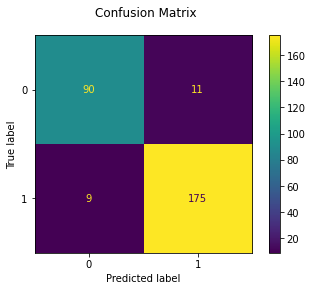

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3516775936566011



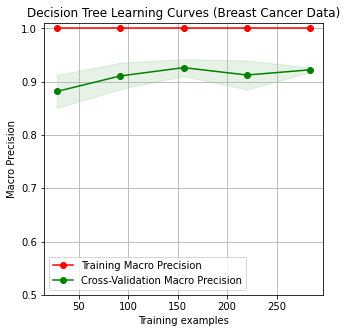

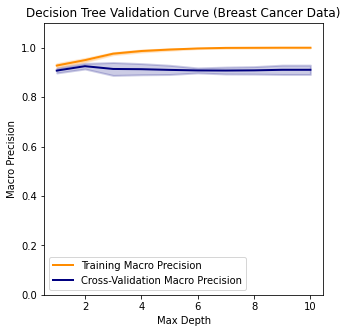

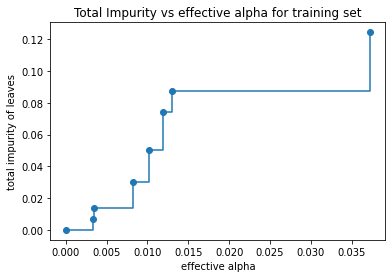

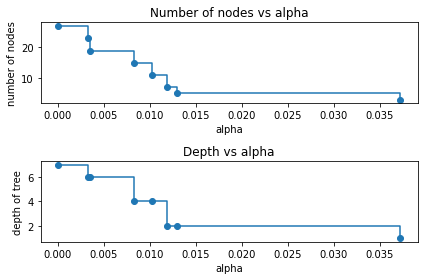

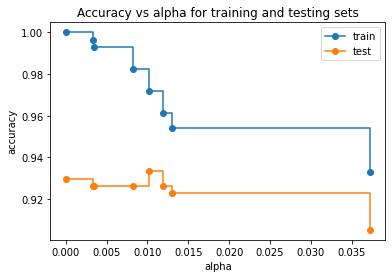

Wall clock time (training):  1.0784661769866943 seconds

Wall clock time (cross validating):  0.01185297966003418 seconds

Wall clock time (prediction):  0.0002810955047607422 seconds

0.91 macro avg precision on TRAINING data with a standard deviation of 0.04

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.01, random_state=0) on TEST data:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       101
           1       0.92      0.97      0.94       184

    accuracy                           0.93       285
   macro avg       0.93      0.91      0.92       285
weighted avg       0.93      0.93      0.93       285


Confusion matrix:
[[ 86  15]
 [  6 178]]


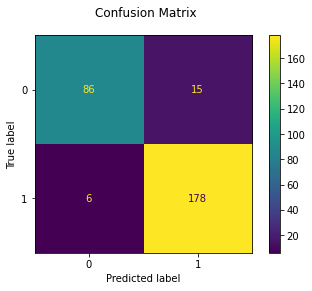

[]

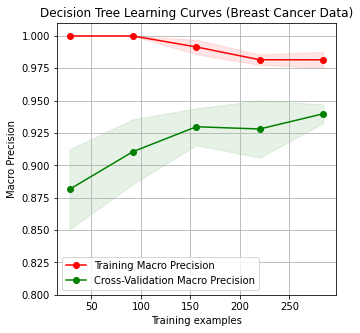

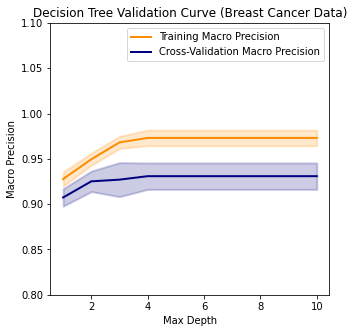

In [6]:
# Decision Trees

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")

start = time.time()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.5, shuffle=True
)

clf = DecisionTreeClassifier(criterion="gini", random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("X_train.shape:", X_train.shape, "\n")

# Learn the digits on the train subset
clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()

print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Decision Tree Learning Curves (Breast Cancer Data)"

axes.set_title(title)

ylim=(0.50, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training Macro Precision"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation Macro Precision"
)
axes.legend(loc="best")


# Plot Validation Curve

subset_mask = np.isin(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

# param_range = np.logspace(-6, -1, 5)
param_range = range(1, 11)
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Decision Tree Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Max Depth")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.0, 1.1)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training Macro Precision", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-Validation Macro Precision", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()




# With Pruning

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}\n".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()






clf = DecisionTreeClassifier(criterion="gini", random_state=0, ccp_alpha=0.01)

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()

print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Plot learning curve

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Decision Tree Learning Curves (Breast Cancer Data)"

axes.set_title(title)

ylim=(0.80, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training Macro Precision"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation Macro Precision"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

# param_range = np.logspace(-6, -1, 5)
param_range = range(1,11)
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Decision Tree Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Max Depth")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.8, 1.1)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training Macro Precision", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-Validation Macro Precision", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()

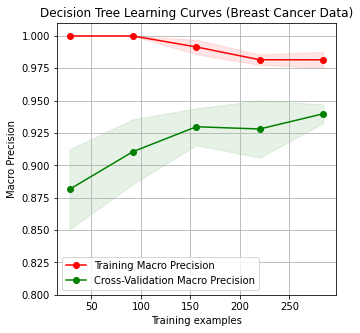

In [27]:
# With Pruning

# fig, ax = plt.subplots()
# ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
# ax.set_xlabel("effective alpha")
# ax.set_ylabel("total impurity of leaves")
# ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# print(
#     "Number of nodes in the last tree is: {} with ccp_alpha: {}\n".format(
#         clfs[-1].tree_.node_count, ccp_alphas[-1]
#     )
# )

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
# ax[0].set_xlabel("alpha")
# ax[0].set_ylabel("number of nodes")
# ax[0].set_title("Number of nodes vs alpha")
# ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
# ax[1].set_xlabel("alpha")
# ax[1].set_ylabel("depth of tree")
# ax[1].set_title("Depth vs alpha")
# fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# fig, ax = plt.subplots()
# ax.set_xlabel("alpha")
# ax.set_ylabel("accuracy")
# ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
# ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
# ax.legend()
# plt.show()






clf = DecisionTreeClassifier(criterion="gini", random_state=0, ccp_alpha=0.01)

clf.fit(X_train, y_train)

training_time = time.time()
# print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()

# print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

# print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

# print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
# print(
#     f"Classification report for classifier {clf} on TEST data:\n"
#     f"{metrics.classification_report(y_test, predicted)}\n"
# )

# disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

# Plot learning curve

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Decision Tree Learning Curves (Breast Cancer Data)"

axes.set_title(title)

ylim=(0.80, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training Macro Precision"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation Macro Precision"
)
axes.legend(loc="best")


# # Plot Validation Curve

# param_range = range(1,11)
# train_scores, test_scores = validation_curve(
#     clf,
#     X,
#     y,
#     param_name="max_depth",
#     param_range=param_range,
#     scoring='precision_macro',
#     n_jobs=-1,
# )
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# _, axes = plt.subplots(figsize=(5, 5))

# axes.set_title("Decision Tree Validation Curve (Breast Cancer Data)")
# axes.set_xlabel(r"Max Depth")
# axes.set_ylabel("Macro Precision")
# axes.set_ylim(0.8, 1.1)
# lw = 2
# axes.plot(
#     param_range, train_scores_mean, label="Training Macro Precision", color="darkorange", lw=lw
# )
# axes.fill_between(
#     param_range,
#     train_scores_mean - train_scores_std,
#     train_scores_mean + train_scores_std,
#     alpha=0.2,
#     color="darkorange",
#     lw=lw,
# )
# axes.plot(
#     param_range, test_scores_mean, label="Cross-Validation Macro Precision", color="navy", lw=lw
# )
# axes.fill_between(
#     param_range,
#     test_scores_mean - test_scores_std,
#     test_scores_mean + test_scores_std,
#     alpha=0.2,
#     color="navy",
#     lw=lw,
# )
# axes.legend(loc="best")
# axes.plot()

n_samples: 569 

X_train.shape: (284, 30)
Wall clock time (training):  0.0023720264434814453 seconds

Wall clock time (cross validating):  0.015290975570678711 seconds

Wall clock time (prediction):  0.0027959346771240234 seconds

0.92 macro avg precision on TRAINING data with a standard deviation of 0.05

Classification report for classifier SVC() on TEST data:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        92
           1       0.91      0.99      0.95       193

    accuracy                           0.93       285
   macro avg       0.94      0.89      0.91       285
weighted avg       0.93      0.93      0.92       285


Confusion matrix:
[[ 73  19]
 [  2 191]]


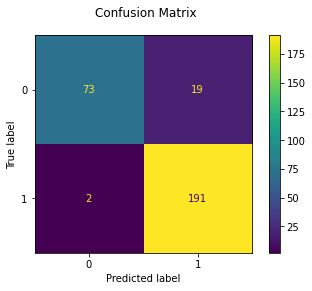

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Wall clock time (training):  0.2495718002319336 seconds

Wall clock time (cross validating):  0.2922680377960205 seconds

Wall clock time (prediction):  0.0007212162017822266 seconds

0.96 macro avg precision on TRAINING data with a standard deviation of 0.02

Classification report for classifier SVC(kernel='linear') on TEST data:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        92
           1       0.97      0.97      0.97       193

    accuracy                           0.96       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.96      0.96       285


Confusion matrix:
[[ 86   6]
 [  6 187]]


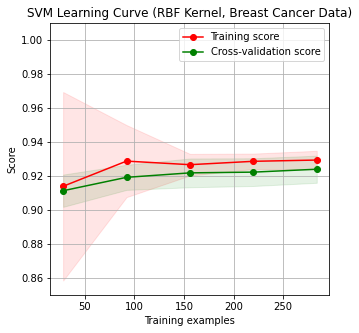

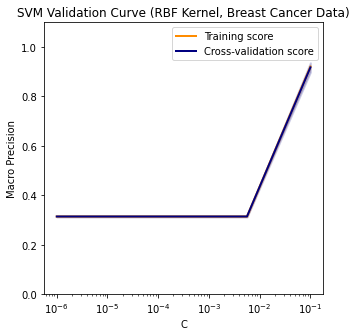

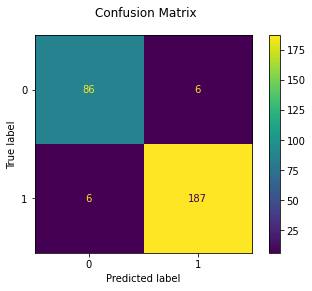

[]

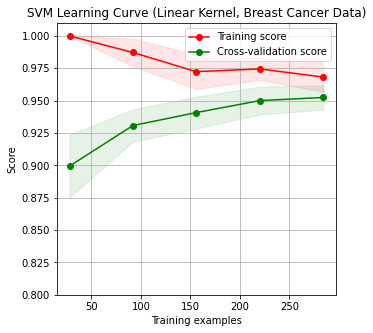

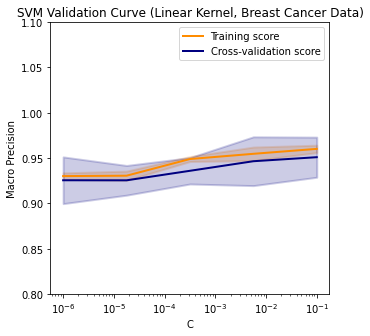

In [10]:
# SUPPORT VECTOR MACHINES


# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")


start = time.time()

# Create a classifier: a support vector classifier
clf = svm.SVC(kernel="rbf")

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)

print("X_train.shape:", X_train.shape)

# Learn the digits on the train subset

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()

print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"SVM Learning Curve (RBF Kernel, Breast Cancer Data)"

axes.set_title(title)

ylim=(0.85, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="C",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("SVM Validation Curve (RBF Kernel, Breast Cancer Data)")
axes.set_xlabel(r"C")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.0, 1.1)
lw = 2
axes.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()






##############################################






start = time.time()

# Create a classifier: a support vector classifier
clf = svm.SVC(kernel="linear")


# Learn the digits on the train subset

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()

print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axesL = plt.subplots(figsize=(5, 5))

title = r"SVM Learning Curve (Linear Kernel, Breast Cancer Data)"

axesL.set_title(title)

ylim=(0.8, 1.01)

if ylim is not None:
    axesL.set_ylim(*ylim)
axesL.set_xlabel("Training examples")
axesL.set_ylabel("Score")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axesL.grid()
axesL.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axesL.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axesL.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axesL.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axesL.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="C",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axesL = plt.subplots(figsize=(5, 5))

axesL.set_title("SVM Validation Curve (Linear Kernel, Breast Cancer Data)")
axesL.set_xlabel(r"C")
axesL.set_ylabel("Macro Precision")
axesL.set_ylim(0.8, 1.1)
lw = 2
axesL.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axesL.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axesL.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axesL.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axesL.legend(loc="best")
axesL.plot()


n_samples: 569 

X_train.shape: (284, 30)
Wall clock time (training):  0.4118077754974365 seconds

Wall clock time (cross validating):  0.47398829460144043 seconds

Wall clock time (prediction):  0.0006306171417236328 seconds

0.92 macro avg precision on TRAINING data with a standard deviation of 0.04

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), max_iter=20000,
              random_state=1) on TEST data:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       104
           1       0.88      0.99      0.93       181

    accuracy                           0.91       285
   macro avg       0.93      0.88      0.90       285
weighted avg       0.92      0.91      0.91       285


Confusion matrix:
[[ 80  24]
 [  2 179]]


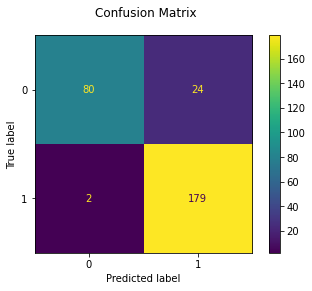

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[]

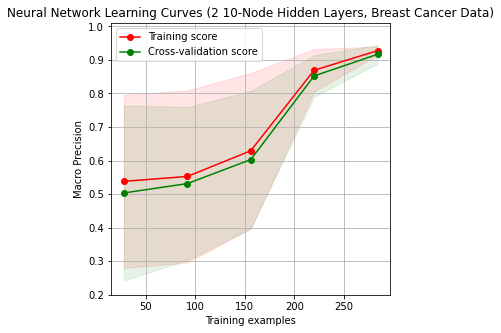

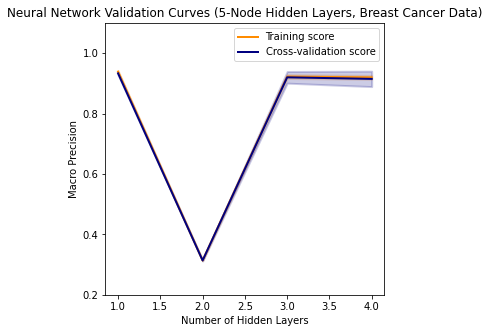

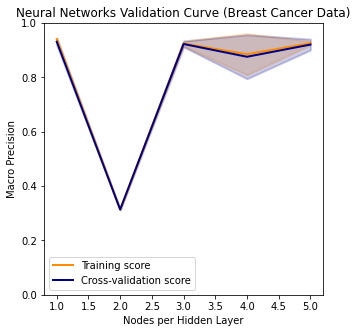

In [32]:
# NEURAL NETWORK


# Standard scientific Python imports
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")

start = time.time()

clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1, max_iter=20000)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)

print("X_train.shape:", X_train.shape)

# Learn the digits on the train subset

clf.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()
print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"Neural Network Learning Curves (2 10-Node Hidden Layers, Breast Cancer Data)"

axes.set_title(title)

ylim=(0.2, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(5), (5,5), (5, 5, 5), (5, 5, 5, 5)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=[1, 2, 3, 4],
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Network Validation Curves (5-Node Hidden Layers, Breast Cancer Data)")
axes.set_xlabel(r"Number of Hidden Layers")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.2, 1.1)
lw = 2
axes.plot(
    [1, 2, 3, 4], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    [1, 2, 3, 4], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    [1, 2, 3, 4],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()




##################################################




clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1, max_iter=20000)



# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [(i, i) for i in range(1,6)]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="hidden_layer_sizes",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("Neural Networks Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Nodes per Hidden Layer")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.0, 1.0)
lw = 2
axes.plot(
    range(1,6), train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    range(1,6),
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    range(1,6), test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    range(1,6),
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()

n_samples: 569 



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/

Wall clock time (training):  0.49709415435791016 seconds



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/

Wall clock time (cross validating):  1.6581768989562988 seconds

Wall clock time (prediction):  0.028081893920898438 seconds

0.97 macro avg precision on TRAINING data with a standard deviation of 0.02

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.01, random_state=0) on TEST data:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       111
           1       0.95      0.97      0.96       174

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285


Confusion matrix:
[[103   8]
 [  6 168]]


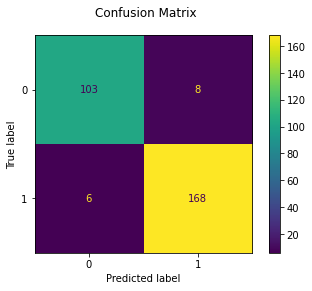

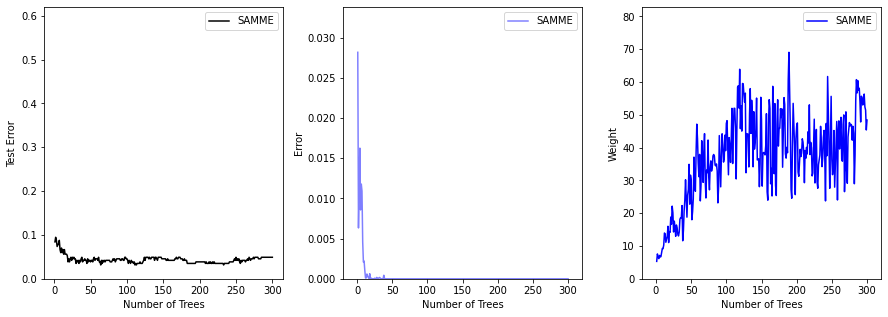

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Library/Frameworks/

[]

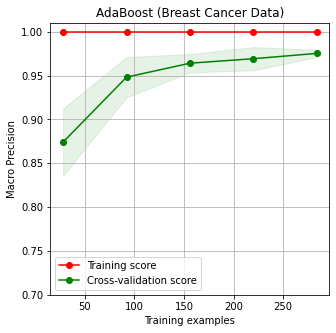

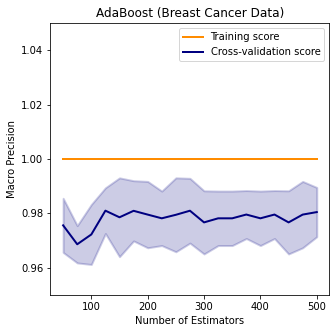

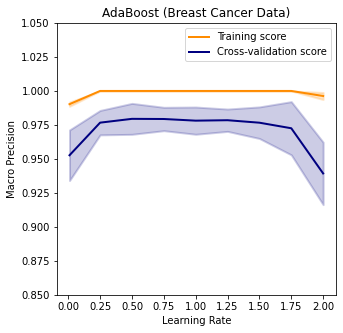

In [28]:
# BOOSTING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, train_test_split, validation_curve

import numpy as np
import time

X, y = datasets.load_breast_cancer(return_X_y=True)
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")

start = time.time()

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)

# bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

training_time = time.time()
print("Wall clock time (training): ", training_time - start, "seconds\n")

scores = cross_val_score(bdt_discrete, X_train, y_train, n_jobs=-1, scoring='precision_macro')

cross_validate_time = time.time()
print("Wall clock time (cross validating): ", cross_validate_time - training_time, "seconds\n")

# Predict the value of the digit on the test subset
predicted = bdt_discrete.predict(X_test)

prediction_time = time.time()

print("Wall clock time (prediction): ", prediction_time - cross_validate_time, "seconds\n")

print("%0.2f macro avg precision on TRAINING data with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
    
print(
    f"Classification report for classifier {clf} on TEST data:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# real_test_errors = []
discrete_test_errors = []

for discrete_train_predict in bdt_discrete.staged_predict(X_test):
    discrete_test_errors.append(1.0 - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
# n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
# real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")

plt.legend()
plt.ylim(0.0, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)

plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim(0.0, discrete_estimator_errors.max() * 1.2)
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

# # Predict the value of the digit on the test subset
# predicted = bdt_discrete.predict(X_test)

# print(
#     f"Classification report for classifier {clf}:\n"
#     f"{metrics.classification_report(y_test, predicted)}\n"
# )

# disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"AdaBoost (Breast Cancer Data)"

axes.set_title(title)

ylim=(0.70, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    bdt_discrete,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = range(50, 501, 25)
train_scores, test_scores = validation_curve(
    bdt_discrete,
    X,
    y,
    param_name="n_estimators",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("AdaBoost (Breast Cancer Data)")
axes.set_xlabel(r"Number of Estimators")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.95, 1.05)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()







# Plot Validation Curve

# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# X, y = X[subset_mask], y[subset_mask]

param_range = [0.01, 0.25, 0.5, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0]
train_scores, test_scores = validation_curve(
    bdt_discrete,
    X,
    y,
    param_name="learning_rate",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("AdaBoost (Breast Cancer Data)")
axes.set_xlabel(r"Learning Rate")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.85, 1.05)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()

n_samples: 569 

Classification report for classifier KNeighborsClassifier(n_neighbors=15, weights='distance'):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       111
           1       0.91      0.97      0.94       174

    accuracy                           0.92       285
   macro avg       0.93      0.91      0.92       285
weighted avg       0.92      0.92      0.92       285


Confusion matrix:
[[ 94  17]
 [  5 169]]


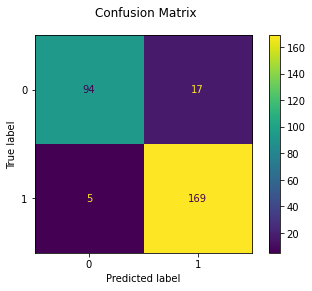

[]

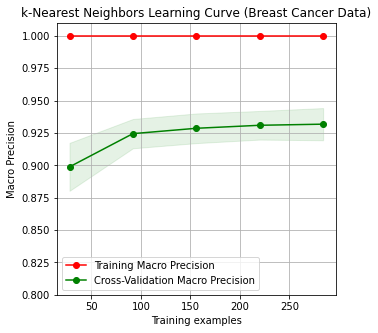

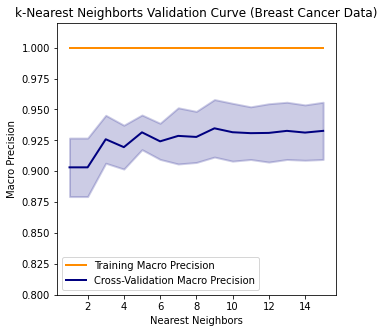

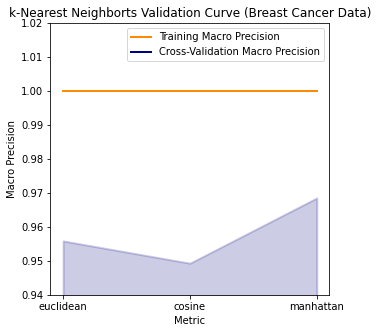

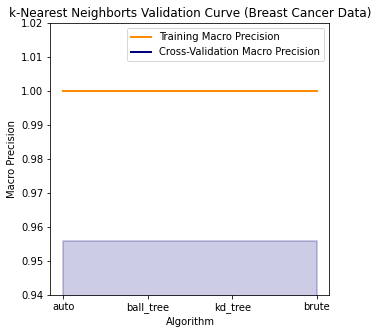

In [33]:
# KNN

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay


X, y = datasets.load_breast_cancer(return_X_y=True)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True
)
    
# flatten the images
n_samples = len(X)
print("n_samples:", n_samples, "\n")


start = time.time()

n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Plot learning curve


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

_, axes = plt.subplots(figsize=(5, 5))

title = r"k-Nearest Neighbors Learning Curve (Breast Cancer Data)"

axes.set_title(title)

ylim=(0.80, 1.01)

if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Macro Precision")


train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf,
    X,
    y,
    scoring="precision_macro",
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training Macro Precision"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation Macro Precision"
)
axes.legend(loc="best")


# Plot Validation Curve

subset_mask = np.isin(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

# param_range = np.logspace(-6, -1, 5)
param_range = range(1, 16)
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    param_name="n_neighbors",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("k-Nearest Neighborts Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Nearest Neighbors")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.80, 1.02)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training Macro Precision", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-Validation Macro Precision", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()


# Plot Validation Curve

subset_mask = np.isin(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

# param_range = np.logspace(-6, -1, 5)
# param_range = ["auto", "ball_tree", "kd_tree", "brute"]
param_range = ["euclidean", "cosine", "manhattan"]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    # param_name="algorithm",
    param_name="metric",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("k-Nearest Neighborts Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Metric")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.94, 1.02)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training Macro Precision", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-Validation Macro Precision", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()

# Plot Validation Curve

subset_mask = np.isin(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

# param_range = np.logspace(-6, -1, 5)
param_range = ["auto", "ball_tree", "kd_tree", "brute"]
train_scores, test_scores = validation_curve(
    clf,
    X,
    y,
    # param_name="algorithm",
    param_name="algorithm",
    param_range=param_range,
    scoring='precision_macro',
    n_jobs=-1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(figsize=(5, 5))

axes.set_title("k-Nearest Neighborts Validation Curve (Breast Cancer Data)")
axes.set_xlabel(r"Algorithm")
axes.set_ylabel("Macro Precision")
axes.set_ylim(0.94, 1.02)
lw = 2
axes.plot(
    param_range, train_scores_mean, label="Training Macro Precision", color="darkorange", lw=lw
)
axes.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
axes.plot(
    param_range, test_scores_mean, label="Cross-Validation Macro Precision", color="navy", lw=lw
)
axes.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
axes.legend(loc="best")
axes.plot()


learning on dataset breast cancer
training: constant learning-rate
Training set score: 0.984183
Training set loss: 0.064651
training: constant with momentum
Training set score: 0.989455
Training set loss: 0.044569
training: constant with Nesterov's momentum
Training set score: 0.980668
Training set loss: 0.056754
training: inv-scaling learning-rate
Training set score: 0.797891
Training set loss: 0.595758
training: inv-scaling with momentum
Training set score: 0.934974
Training set loss: 0.239022
training: inv-scaling with Nesterov's momentum
Training set score: 0.936731
Training set loss: 0.240550
training: adam
Training set score: 0.985940
Training set loss: 0.046896


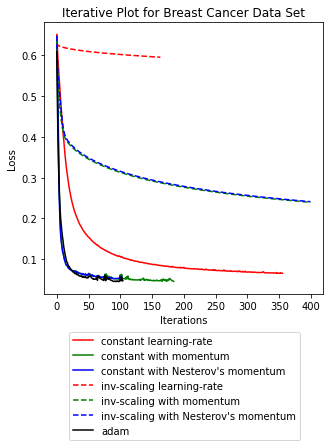

In [23]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


fig, axes = plt.subplots(figsize=(5, 5))
# load / generate some toy datasets
X, y = datasets.load_breast_cancer(return_X_y=True)


# for each dataset, plot learning for each learning strategy
print("\nlearning on dataset breast cancer")
axes.set_title("Iterative Plot for Breast Cancer Data Set")
axes.set_xlabel("Iterations")
axes.set_ylabel("Loss")

X = MinMaxScaler().fit_transform(X)

mlps = []

max_iter = 400

for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore", category=ConvergenceWarning, module="sklearn"
        )
        mlp.fit(X, y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X, y))
    print("Training set loss: %f" % mlp.loss_)
for mlp, label, args in zip(mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label, **args)

fig.legend(axes.get_lines(), labels, ncol=1, loc="right", bbox_to_anchor=(0.35, -0.38, 0.5, 0.5))
plt.show()